Monte Carlo simulation can be used to estimate the outcome of non-deterministic processes where that follow some probability distribution.

There are two components that we need to run a Monte Carlo simulation:

. The equation to evaluate
. The random variables for the input

In this example we are considering leasing a machine for a manufacturing process. The one-year lease costs is $300,000. There are some estimations on the 90% confidence interval of the impact.

- savings between 5 and -2 dollars to produce each unit.
- savings between 20 and 15 dollars to transport each unit.
- production increase between 30000 and 20000.

We want to know if it's worth investing in buying the machine.




In [6]:
%matplotlib inline
import scipy
from scipy.stats import norm
import pandas as pd
from matplotlib import pyplot as plt

machinery_cost = 300000

number_of_simulations = 1000000
confidence = 0.90
n =1000

conf_interval = (scipy.stats.t.ppf((1 + confidence) / 2., n-1))*2


# Defining the variables

# We find the distrubutions of the potential savings that we will have
transport_saving = norm(loc = (20 + 15) / 2, scale = (20 - 15) / conf_interval)
# Savings in labour are xtimated between 5 and -1
labor_saving = norm(loc = (5 - (-2)) / 2, scale = (5 - (-2)) / conf_interval)
transport_results = transport_saving.rvs(number_of_simulations)
labor_results = labor_saving.rvs(number_of_simulations)
prod_level = norm(loc = (30000 + 20000) / 2, scale = (30000 - 10000) / conf_interval)

prod_level_results = prod_level.rvs(number_of_simulations)
data = pd.DataFrame({
    "transport_saving_per_unit": transport_results,
    "labor_savings_per_unit": labor_results,
    "production_level": prod_level_results
})
data["total_savings"] = 0


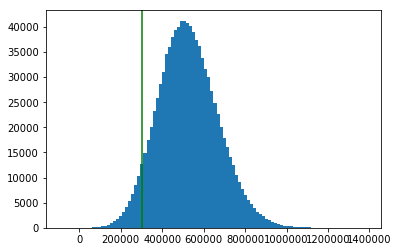

'The probability of losing money is: 5.0261%'

In [2]:
plt.hist(data.total_savings, bins = 100)
plt.axvline(x = machinery_cost, c = "g")
plt.show()

probability_losing_money = data[data["total_savings"] < machinery_cost].count()["total_savings"] / 1000000
f"The probability of losing money is: {probability_losing_money*100}%"

# Familiarize with OpenAI's Gym
The Gyms provides a set of environment where it's possible to test and train different Reinforcement Learning algorithms.

It's possible to find more information about the environment here: https://gym.openai.com/.

In [2]:
%matplotlib inline

import gym
import matplotlib.pyplot as plt

# Choose environment
env_names = ['FrozenLake-v0', 'CartPole-v0']

env_name = env_names[0]
# Create Environment
env = gym.make(env_name)

# This funciotn cna be use to visualize the results directly in the notebook
render_in_jp = lambda : plt.imshow(env.render(mode='rgb_array'))

env.reset()
# render_in_jp()
print('Starting the enviroment')
env.render()
# Taking step 1
env.step(1)
print('Enviroment after step 1')
env.render()


Starting the enviroment

SFFF
FHFH
FFFH
HFFG
Enviroment after step 1
  (Down)
SFFF
FHFH
FFFH
HFFG


In [3]:

n_actions = env.action_space.n
n_states = env.observation_space.n

# Actions are left, up, right, down
print(f'Number of actions {n_actions} for the {env_name} enviroment')
# States are the 16 fields
print(f'Number of possible states {n_states} for the {env_name} enviroment')

Number of actions 4 for the FrozenLake-v0 enviroment
Number of possible states 16 for the FrozenLake-v0 enviroment


In [5]:
# TODO: Fix, it does not work because of OpenGL

# import gym
# import matplotlib.pyplot as plt

# render_in_jp = lambda : plt.imshow(env.render(mode='rgb_array'))

# env = gym.make('CartPole-v0')

# for i_episode in range(2):
#     observation = env.reset()
#     for t in range(10):
#         render_in_jp()
#         action = 1
#         # When Calling the step method on the enviroment object
#         # We return 
#         observation, reward, done, info = env.step(action)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
# env.close()


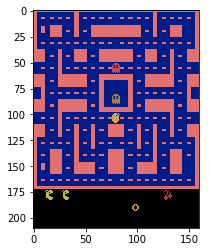

In [4]:
env = gym.make('MsPacman-v0')
env.reset()
for _ in range(10):
    render_in_jp()
    env.step(env.action_space.sample()) # take a random action
env.close()

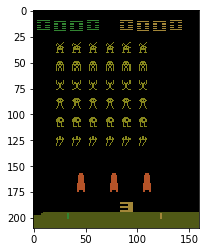

In [5]:
env = gym.make('SpaceInvaders-v0')
env.reset()
for _ in range(10):
    render_in_jp()
    env.step(env.action_space.sample()) # take a random action
env.close()

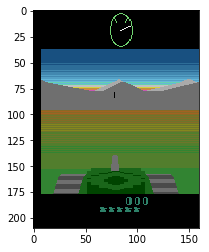

In [6]:
# This is only using the observation is the RAM of the Atari machine
# consisting of 128 bytes
env = gym.make('BattleZone-ram-v0')
env.reset()
for _ in range(10):
    render_in_jp()
    env.step(env.action_space.sample()) # take a random action
env.close()
